In [ ]:
#Importing the neccessary packages for UNET

In [4]:
import pickle

from keras.models import Input, Model
from keras.layers import Conv2D, Concatenate, MaxPooling2D, Conv2DTranspose
from keras.layers import UpSampling2D, Dropout, BatchNormalization

In [5]:
#defining functions for down block, up block and bottleneck by passing input through adequate layers

In [6]:
image_size=368
def down_block(x,filters,kernel_size=(3,3),padding='same',strides=1):
    c = Conv2D(filters,kernel_size , activation='relu', padding=padding,strides=strides)(x)
    c = Conv2D(filters,kernel_size , activation='relu', padding=padding,strides=strides)(c)
    p= MaxPooling2D((2,2),(2,2))(c)
    return c,p

def up_block(x,skip,filters,kernel_size=(3,3),padding='same',strides=1):
    u= UpSampling2D((2,2))(x)
    concat=Concatenate()([u,skip])
    c=Conv2D(filters,kernel_size , activation='relu', padding=padding,strides=strides)(concat)
    c=Conv2D(filters,kernel_size , activation='relu', padding=padding,strides=strides)(c)
    return c

def bottleneck(x,filters,kernel_size=(3,3),padding='same',strides=1):
    c=Conv2D(filters,kernel_size , activation='relu', padding=padding,strides=strides)(x)
    c=Conv2D(filters,kernel_size , activation='relu', padding=padding,strides=strides)(c)
    return c

def Unet():  # defining UNET model
    f=[16,32,64,128,256]    # defining filter sizes
    inputs=Input((image_size,image_size,1))
    p0=inputs
    c1,p1=down_block(p0,f[0])
    c2,p2=down_block(p1,f[1])
    c3,p3=down_block(p2,f[2])
    c4,p4=down_block(p3,f[3])
    
    b=bottleneck(p4,f[4])
    
    u1=up_block(b,c4,f[3])
    u2=up_block(u1,c3,f[2])
    u3=up_block(u2,c2,f[1])
    u4=up_block(u3,c1,f[0])
    
    outputs= Conv2D(1,(1,1),padding="same",activation="sigmoid")(u4)
    model= Model(inputs,outputs)
    return model
    

In [7]:
# Taking the input image as train images and segmented images as training labels

In [8]:
with open('train_images.pkl', 'rb') as fin:
    input_images = pickle.load(fin)
with open('train_labels.pkl', 'rb') as fin:
    output_tensors = pickle.load(fin)

In [9]:
model = Unet()

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 368, 368, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 368, 368, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 368, 368, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 184, 184, 16) 0           conv2d_2[0][0]                   
_____________

In [76]:
model.fit(input_images, output_tensors, batch_size=4, epochs=20)

Epoch 1/20
147/147 [==============================] - 53s 362ms/step - loss: 0.3656 - acc: 0.8188
Epoch 2/20
147/147 [==============================] - 53s 364ms/step - loss: 0.3540 - acc: 0.8276
Epoch 3/20
147/147 [==============================] - 53s 362ms/step - loss: 0.3662 - acc: 0.8210
Epoch 4/20
147/147 [==============================] - 53s 363ms/step - loss: 0.3564 - acc: 0.8271
Epoch 5/20
147/147 [==============================] - 53s 361ms/step - loss: 0.3560 - acc: 0.8295
Epoch 6/20
147/147 [==============================] - 53s 358ms/step - loss: 0.3559 - acc: 0.8277
Epoch 7/20
147/147 [==============================] - 53s 361ms/step - loss: 0.3456 - acc: 0.8347
Epoch 8/20
147/147 [==============================] - 53s 362ms/step - loss: 0.3437 - acc: 0.8340
Epoch 9/20
147/147 [==============================] - 53s 363ms/step - loss: 0.3460 - acc: 0.8330
Epoch 10/20
147/147 [==============================] - 53s 363ms/step - loss: 0.3627 - acc: 0.8397
Epoch 11/20
147/147

In [12]:
# By taking 10 epochs we are getting accuracy of 0.8275 and this can be increased by increasing the no. of epochs

In [13]:
# saving the model and weights

In [77]:

model.save_weights('unet_segmentation_weights.h5')

# NOTE: More strong model can be built if we increase the number of images by using data augmentation 

# Predicting 

In [78]:
import numpy as np
import os
import pickle
import warnings

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.color import rgb2gray
from skimage import io
from skimage.io import imread
from skimage.transform import resize
from keras.models import load_model

warnings.filterwarnings('ignore')
%matplotlib inline

In [116]:

result=model.predict(input_images[120].reshape(-1,368,368,1))
result=result>0.55# setting the threshold


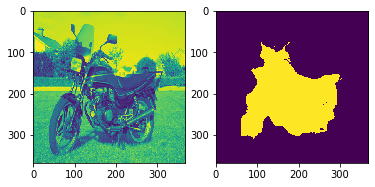

In [117]:
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.imshow(np.reshape(input_images[120],(368,368)))
ax=fig.add_subplot(1,2,2)

ax.imshow(np.reshape(result,(368,368)))
